In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib as ml
import matplotlib.pyplot as plt
import datetime

In [2]:
rawLinks = pd.read_csv('data/9606.protein.links.v10.5.txt', delim_whitespace=True)
rawAlias = pd.read_csv('data/9606.protein.aliases.v10.5.txt', delimiter='\t')
print('Here')
print(str(datetime.datetime.now()))

Here
2019-01-16 20:26:08.951184


In [3]:
#build a map of proteinId in rawLinks to gene product names
proteinIdToAlias = {}
for val in list(zip(rawAlias.string_protein_id, rawAlias.alias)):
    if not val[0] in proteinIdToAlias: #the alias file has lots of duplicates!
        proteinIdToAlias[val[0]]=[val[1]]
    else:
        proteinIdToAlias[val[0]].append(val[1])
        
print('Here')
print(str(datetime.datetime.now()))

Here
2019-01-16 20:26:10.071665


In [4]:
#build the list of links mapped to gene product name
links = list(zip(rawLinks.protein1, rawLinks.protein2, rawLinks.combined_score))
print('Here')
print(str(datetime.datetime.now()))

Here
2019-01-16 20:26:12.017748


In [5]:
#filter links where both in and out are in the dataset
acceptableGeneList = pd.read_csv('Diff_2_3_01.txt', header=None)
acceptableGeneSet = set(acceptableGeneList[0])

print(len(acceptableGeneList))
print(str(datetime.datetime.now()))

filteredLinks = []
for link in links:
    aliasesOfStart = proteinIdToAlias[link[0]]
    aliasesOfEnd = proteinIdToAlias[link[1]]
    
    startIsAcceptable = not acceptableGeneSet.isdisjoint(aliasesOfStart)
    endIsAcceptable = not acceptableGeneSet.isdisjoint(aliasesOfEnd)
    
    if startIsAcceptable and endIsAcceptable:
        filteredLinks.append(link)
        
print(len(filteredLinks))
print(str(datetime.datetime.now()))

1986
2019-01-16 20:26:12.033200
162118
2019-01-16 20:27:42.917267


In [6]:
print(str(datetime.datetime.now()))
G = nx.DiGraph()
G.add_weighted_edges_from(filteredLinks)
nx.write_gml(G, "out/gephi/grid_2_3.gml")
print("Now open out/gephi/grid_2_3.gml")
print(str(datetime.datetime.now()))

2019-01-16 20:27:42.922522
Now open out/gephi/grid_2_3.gml
2019-01-16 20:27:43.997209


(array([84992., 26670., 13832.,  8838.,  5878.,  4018.,  2934.,  2800.,
         6504.,  5652.]),
 array([150. , 234.9, 319.8, 404.7, 489.6, 574.5, 659.4, 744.3, 829.2,
        914.1, 999. ]),
 <a list of 10 Patch objects>)

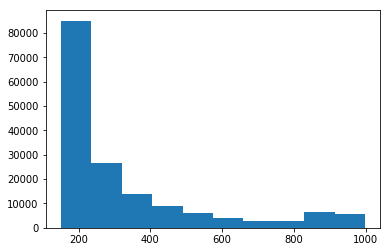

In [7]:
weights = []
for link in filteredLinks:
    weights.append(link[2])
    
plt.hist(weights)